In [1]:
import cv2
import matplotlib.pyplot as plt

In [2]:
config_file= "ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt"
frozen_model="frozen_inference_graph.pb"

In [3]:
model = cv2.dnn_DetectionModel(frozen_model,config_file)


In [4]:
classlabels = []
file_name = "Coco Labels.txt"
with open (file_name,'rt') as fpt:
    classlabels= fpt.read().rstrip('\n').split('\n')

In [5]:
print(classlabels)

['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


In [6]:
print(len(classlabels))

80


In [7]:
model.setInputSize(320,320)
model.setInputScale(1.0/127.5)
model.setInputMean((127.5,127.5,127.5))
model.setInputSwapRB(True)

< cv2.dnn.Model 0000021DC45609F0>

# Reading an Image

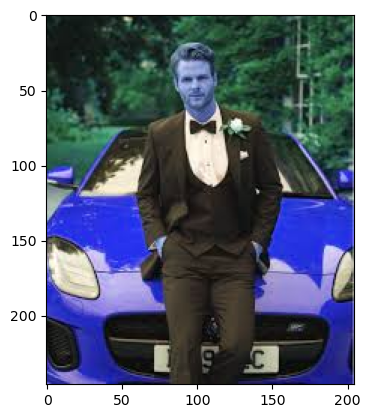

In [8]:
image=cv2.imread('man_car.jfif')
plt.imshow(image) #bgr

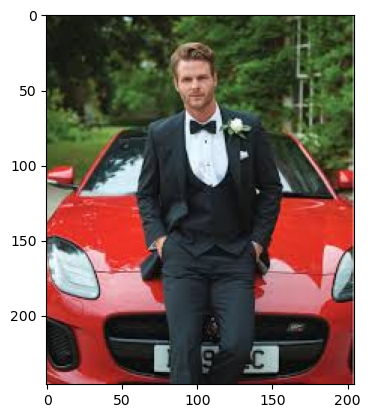

In [9]:
plt.imshow(cv2.cvtColor(image,cv2.COLOR_BGR2RGB))

# IMAGE DETECTION

In [10]:
ClassIndex,confidence,bbox = model.detect(image,confThreshold=0.6)
print (ClassIndex)

[1 3]


In [11]:
font_scale= 2
font = cv2.FONT_HERSHEY_PLAIN
for ClassInd, conf, boxes in zip (ClassIndex.flatten(), confidence.flatten(),bbox):
    cv2.rectangle(image,boxes,(255,0,0),2)
    cv2.putText(image,classlabels[ClassInd-1],(boxes[0]+10,boxes[1]+40),font,font_scale,color=(0,255,0), thickness=2)

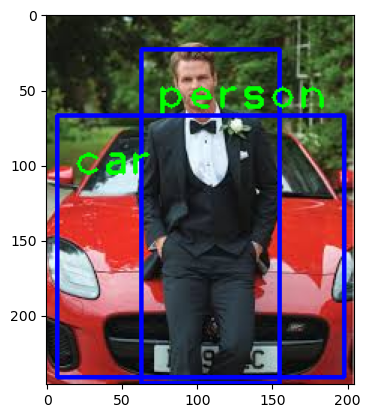

In [12]:
plt.imshow(cv2.cvtColor(image,cv2.COLOR_BGR2RGB))

# VIDEO DETECTION

In [13]:
video_cap= cv2.VideoCapture("pexels-sarowar-hussain-5229647.mp4")

#Check if the video is opened correctly
if not video_cap.isOpened():
    video_cap=cv2.VideoCapture(0)
if not video_cap.isOpened():
    raise IOError ("Video Cannot be Opened")

font_scale=3
font=cv2.FONT_HERSHEY_PLAIN

while True:
    ret,frame = video_cap.read()
    
    ClassIndex,confidence,bbox = model.detect(image,confThreshold=0.4)
    
    print (ClassIndex)
    if (len(ClassIndex)!=0):
        for ClassInd, conf, boxes in zip (ClassIndex.flatten(), confidence.flatten(),bbox):
            if(ClassInd <=80):
                cv2.rectangle(frame,boxes,(255,0,0), 2)
                cv2.putText(frame,classlabels[ClassInd-1],(boxes[0]+10,boxes[1]+40),font,font_scale,color=(0,255,0), thickness=2)
                
        cv2.imshow('Video_cap',frame)
    
    if cv2.waitKey(2) & 0xFF == ord ('q'):
        break
        
video_cap.release()
cv2.destroyAllWindows()


[ 1  1  3  1 31]
[ 1  1  3  1 31]
[ 1  1  3  1 31]
[ 1  1  3  1 31]
[ 1  1  3  1 31]
[ 1  1  3  1 31]
[ 1  1  3  1 31]
[ 1  1  3  1 31]
[ 1  1  3  1 31]
[ 1  1  3  1 31]
[ 1  1  3  1 31]
[ 1  1  3  1 31]
[ 1  1  3  1 31]
[ 1  1  3  1 31]
[ 1  1  3  1 31]
[ 1  1  3  1 31]
[ 1  1  3  1 31]
[ 1  1  3  1 31]
[ 1  1  3  1 31]
[ 1  1  3  1 31]
[ 1  1  3  1 31]
[ 1  1  3  1 31]
[ 1  1  3  1 31]
[ 1  1  3  1 31]
[ 1  1  3  1 31]
[ 1  1  3  1 31]
[ 1  1  3  1 31]
[ 1  1  3  1 31]
[ 1  1  3  1 31]
[ 1  1  3  1 31]
[ 1  1  3  1 31]
[ 1  1  3  1 31]
[ 1  1  3  1 31]
[ 1  1  3  1 31]
[ 1  1  3  1 31]
[ 1  1  3  1 31]
[ 1  1  3  1 31]
[ 1  1  3  1 31]
[ 1  1  3  1 31]
[ 1  1  3  1 31]
[ 1  1  3  1 31]
[ 1  1  3  1 31]
[ 1  1  3  1 31]
[ 1  1  3  1 31]
[ 1  1  3  1 31]
[ 1  1  3  1 31]
[ 1  1  3  1 31]
[ 1  1  3  1 31]
[ 1  1  3  1 31]
[ 1  1  3  1 31]
[ 1  1  3  1 31]
[ 1  1  3  1 31]
[ 1  1  3  1 31]
[ 1  1  3  1 31]
[ 1  1  3  1 31]
[ 1  1  3  1 31]
[ 1  1  3  1 31]
[ 1  1  3  1 31]
[ 1  1  3  1 3

[ 1  1  3  1 31]
[ 1  1  3  1 31]
[ 1  1  3  1 31]
[ 1  1  3  1 31]
[ 1  1  3  1 31]
[ 1  1  3  1 31]
[ 1  1  3  1 31]
[ 1  1  3  1 31]
[ 1  1  3  1 31]
[ 1  1  3  1 31]
[ 1  1  3  1 31]
[ 1  1  3  1 31]
[ 1  1  3  1 31]
[ 1  1  3  1 31]
[ 1  1  3  1 31]
[ 1  1  3  1 31]
[ 1  1  3  1 31]
[ 1  1  3  1 31]
[ 1  1  3  1 31]
[ 1  1  3  1 31]
[ 1  1  3  1 31]
[ 1  1  3  1 31]
[ 1  1  3  1 31]
[ 1  1  3  1 31]
[ 1  1  3  1 31]
[ 1  1  3  1 31]
[ 1  1  3  1 31]
[ 1  1  3  1 31]
[ 1  1  3  1 31]
[ 1  1  3  1 31]
[ 1  1  3  1 31]
[ 1  1  3  1 31]
[ 1  1  3  1 31]
[ 1  1  3  1 31]
[ 1  1  3  1 31]
[ 1  1  3  1 31]
[ 1  1  3  1 31]
[ 1  1  3  1 31]
[ 1  1  3  1 31]
[ 1  1  3  1 31]
[ 1  1  3  1 31]
[ 1  1  3  1 31]
[ 1  1  3  1 31]
[ 1  1  3  1 31]
[ 1  1  3  1 31]
[ 1  1  3  1 31]
[ 1  1  3  1 31]
[ 1  1  3  1 31]
[ 1  1  3  1 31]
[ 1  1  3  1 31]
[ 1  1  3  1 31]
[ 1  1  3  1 31]
[ 1  1  3  1 31]
[ 1  1  3  1 31]
[ 1  1  3  1 31]
[ 1  1  3  1 31]
[ 1  1  3  1 31]
[ 1  1  3  1 31]
[ 1  1  3  1 3

[ 1  1  3  1 31]
[ 1  1  3  1 31]
[ 1  1  3  1 31]
[ 1  1  3  1 31]
[ 1  1  3  1 31]
[ 1  1  3  1 31]
[ 1  1  3  1 31]
[ 1  1  3  1 31]
[ 1  1  3  1 31]
[ 1  1  3  1 31]
[ 1  1  3  1 31]
[ 1  1  3  1 31]
[ 1  1  3  1 31]
[ 1  1  3  1 31]
[ 1  1  3  1 31]
[ 1  1  3  1 31]
[ 1  1  3  1 31]
[ 1  1  3  1 31]
[ 1  1  3  1 31]
[ 1  1  3  1 31]
[ 1  1  3  1 31]
[ 1  1  3  1 31]
[ 1  1  3  1 31]
[ 1  1  3  1 31]
[ 1  1  3  1 31]
[ 1  1  3  1 31]
[ 1  1  3  1 31]
[ 1  1  3  1 31]
[ 1  1  3  1 31]
[ 1  1  3  1 31]
[ 1  1  3  1 31]
[ 1  1  3  1 31]
[ 1  1  3  1 31]
[ 1  1  3  1 31]
[ 1  1  3  1 31]
[ 1  1  3  1 31]
[ 1  1  3  1 31]
[ 1  1  3  1 31]
[ 1  1  3  1 31]
[ 1  1  3  1 31]
[ 1  1  3  1 31]
[ 1  1  3  1 31]
[ 1  1  3  1 31]
[ 1  1  3  1 31]
[ 1  1  3  1 31]
[ 1  1  3  1 31]
[ 1  1  3  1 31]
[ 1  1  3  1 31]
[ 1  1  3  1 31]
[ 1  1  3  1 31]
[ 1  1  3  1 31]
[ 1  1  3  1 31]
[ 1  1  3  1 31]
[ 1  1  3  1 31]
[ 1  1  3  1 31]
[ 1  1  3  1 31]
[ 1  1  3  1 31]
[ 1  1  3  1 31]
[ 1  1  3  1 3

[ 1  1  3  1 31]
[ 1  1  3  1 31]
[ 1  1  3  1 31]
[ 1  1  3  1 31]
[ 1  1  3  1 31]
[ 1  1  3  1 31]
[ 1  1  3  1 31]
[ 1  1  3  1 31]
[ 1  1  3  1 31]
[ 1  1  3  1 31]
[ 1  1  3  1 31]
[ 1  1  3  1 31]
[ 1  1  3  1 31]
[ 1  1  3  1 31]
[ 1  1  3  1 31]
[ 1  1  3  1 31]
[ 1  1  3  1 31]
[ 1  1  3  1 31]
[ 1  1  3  1 31]
[ 1  1  3  1 31]
[ 1  1  3  1 31]
[ 1  1  3  1 31]
[ 1  1  3  1 31]
[ 1  1  3  1 31]
[ 1  1  3  1 31]
[ 1  1  3  1 31]
[ 1  1  3  1 31]
[ 1  1  3  1 31]
[ 1  1  3  1 31]
[ 1  1  3  1 31]
[ 1  1  3  1 31]
[ 1  1  3  1 31]
[ 1  1  3  1 31]
[ 1  1  3  1 31]
[ 1  1  3  1 31]
[ 1  1  3  1 31]
[ 1  1  3  1 31]
[ 1  1  3  1 31]
[ 1  1  3  1 31]
[ 1  1  3  1 31]
[ 1  1  3  1 31]
[ 1  1  3  1 31]
[ 1  1  3  1 31]
[ 1  1  3  1 31]
[ 1  1  3  1 31]
[ 1  1  3  1 31]
[ 1  1  3  1 31]
[ 1  1  3  1 31]
[ 1  1  3  1 31]
[ 1  1  3  1 31]
[ 1  1  3  1 31]
[ 1  1  3  1 31]
[ 1  1  3  1 31]
[ 1  1  3  1 31]
[ 1  1  3  1 31]
[ 1  1  3  1 31]
[ 1  1  3  1 31]
[ 1  1  3  1 31]
[ 1  1  3  1 3

error: OpenCV(4.6.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:967: error: (-215:Assertion failed) size.width>0 && size.height>0 in function 'cv::imshow'
